In [ ]:
!pip install fastai


In [ ]:
from fastai.vision import *

In [ ]:
#follow the link below to get your download code from from Roboflow
!pip install -q roboflow
from roboflow import Roboflow
rf = Roboflow(model_format="folder", notebook="roboflow-resnet")

     |████████████████████████████████| 178 kB 7.0 MB/s 
     |████████████████████████████████| 1.1 MB 16.3 MB/s 
     |████████████████████████████████| 67 kB 5.6 MB/s 
     |████████████████████████████████| 596 kB 43.6 MB/s 
     |████████████████████████████████| 145 kB 50.5 MB/s 
     |████████████████████████████████| 138 kB 49.6 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=folder&ref=roboflow-resnet


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="oSQ3W2NV98ysGvMr3Rpk")
project = rf.workspace().project("deep_learning_project_mach-3")
dataset = project.version(1).download("folder")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to deep_learning_project_mach-3-1 in folder:: 100%|██████████| 3172/3172 [00:06<00:00, 528.09it/s]


In [ ]:
dataset.location

'/content/deep_learning_project_mach-3-1'

In [ ]:

#build fastai dataset loader
np.random.seed(42)
path = Path('/content/deep_learning_project_mach-3-1')
data = ImageDataBunch.from_folder(path, size=224, num_workers=4).normalize(imagenet_stats)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
data.classes

['arjun', 'bheem', 'karan', 'krish']

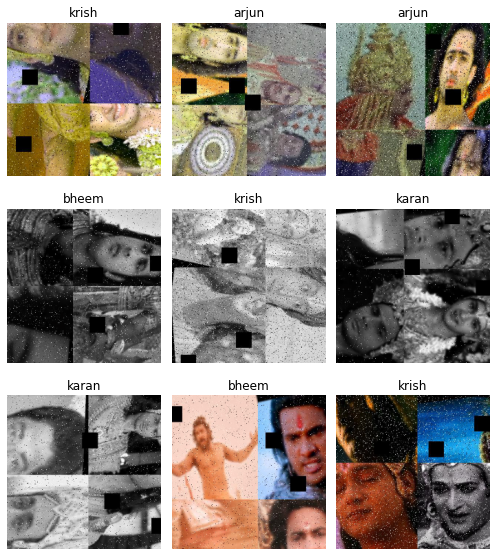

In [ ]:
data.show_batch(rows=3, figsize=(7, 8))

In [ ]:
from fastai.metrics import error_rate # 1 - accuracy
learn = create_cnn(data, models.resnet50, metrics=error_rate)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:
learn


Learner(data=ImageDataBunch;

Train: LabelList (2913 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
krish,krish,krish,krish,krish
Path: /content/deep_learning_project_mach-3-1;

Valid: LabelList (121 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
krish,krish,krish,krish,krish
Path: /content/deep_learning_project_mach-3-1;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


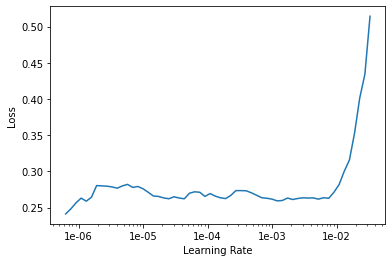

In [ ]:
learn.lr_find();
learn.recorder.plot()

In [ ]:
#training the model
from fastai.callbacks import *
early_stop = EarlyStoppingCallback(learn, patience=20)
save_best_model = SaveModelCallback(learn, name='best_resnet50')

In [ ]:
#frozen training step
defaults.device = torch.device('cuda') # makes sure the gpu is used
learn.fit_one_cycle(30, callbacks=[early_stop, save_best_model])

epoch,train_loss,valid_loss,error_rate,time
0,1.758190,2.057220,0.504132,00:51
1,1.382306,3.148697,0.471074,00:45


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Better model found at epoch 0 with valid_loss value: 2.057220458984375.


epoch,train_loss,valid_loss,error_rate,time
0,1.758190,2.057220,0.504132,00:51
1,1.382306,3.148697,0.471074,00:45
2,1.087920,2.103140,0.462810,00:44
3,0.923407,1.956965,0.504132,00:44
4,0.773067,2.476917,0.479339,00:44
5,0.651310,1.909434,0.438017,00:44
6,0.555520,1.738308,0.396694,00:44
7,0.439620,1.704890,0.413223,00:44
8,0.390883,1.780846,0.421488,00:44
9,0.338204,1.959025,0.421488,00:44


Better model found at epoch 3 with valid_loss value: 1.9569652080535889.
Better model found at epoch 5 with valid_loss value: 1.909434199333191.
Better model found at epoch 6 with valid_loss value: 1.7383079528808594.
Better model found at epoch 7 with valid_loss value: 1.7048903703689575.


KeyboardInterrupt: ignored

In [ ]:
#load best model from frozen training
learn.load('best_resnet50')

Learner(data=ImageDataBunch;

Train: LabelList (2913 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
krish,krish,krish,krish,krish
Path: /content/deep_learning_project_mach-3-1;

Valid: LabelList (121 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
krish,krish,krish,krish,krish
Path: /content/deep_learning_project_mach-3-1;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-

In [ ]:
learn.unfreeze()

In [ ]:
def find_appropriate_lr(model:Learner, lr_diff:int = 15, loss_threshold:float = .05, adjust_value:float = 1, plot:bool = False) -> float:
    #Run the Learning Rate Finder
    model.lr_find()
    
    #Get loss values and their corresponding gradients, and get lr values
    losses = np.array(model.recorder.losses)
    min_loss_index = np.argmin(losses)
    
    
    #loss_grad = np.gradient(losses)
    lrs = model.recorder.lrs
    
    #return the learning rate that produces the minimum loss divide by 10   
    return lrs[min_loss_index] / 10

In [ ]:
optimal_lr = find_appropriate_lr(learn)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [ ]:
learn.fit_one_cycle(30, max_lr=slice(optimal_lr/10, optimal_lr), callbacks=[early_stop, save_best_model])

epoch,train_loss,valid_loss,error_rate,time
0,0.266122,1.798738,0.413223,01:01
1,0.277134,1.716500,0.438017,01:01
2,0.283309,1.690070,0.413223,01:01
3,0.281395,1.747809,0.429752,01:01
4,0.271722,1.706908,0.413223,01:01
5,0.272680,1.734724,0.421488,01:00
6,0.271001,1.889939,0.429752,01:00
7,0.271370,1.741830,0.413223,01:00
8,0.271475,1.699817,0.413223,01:00
9,0.272032,1.654931,0.396694,01:00


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Better model found at epoch 0 with valid_loss value: 1.79873788356781.
Better model found at epoch 1 with valid_loss value: 1.7164995670318604.
Better model found at epoch 2 with valid_loss value: 1.6900702714920044.
Better model found at epoch 9 with valid_loss value: 1.6549309492111206.


In [ ]:
learn.load('best_resnet50')

Learner(data=ImageDataBunch;

Train: LabelList (2913 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
bheem,bheem,bheem,bheem,bheem
Path: /content/deep_learning_project_mach-3-1;

Valid: LabelList (121 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
bheem,bheem,bheem,bheem,bheem
Path: /content/deep_learning_project_mach-3-1;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


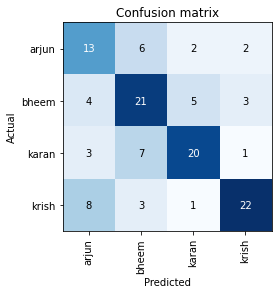

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

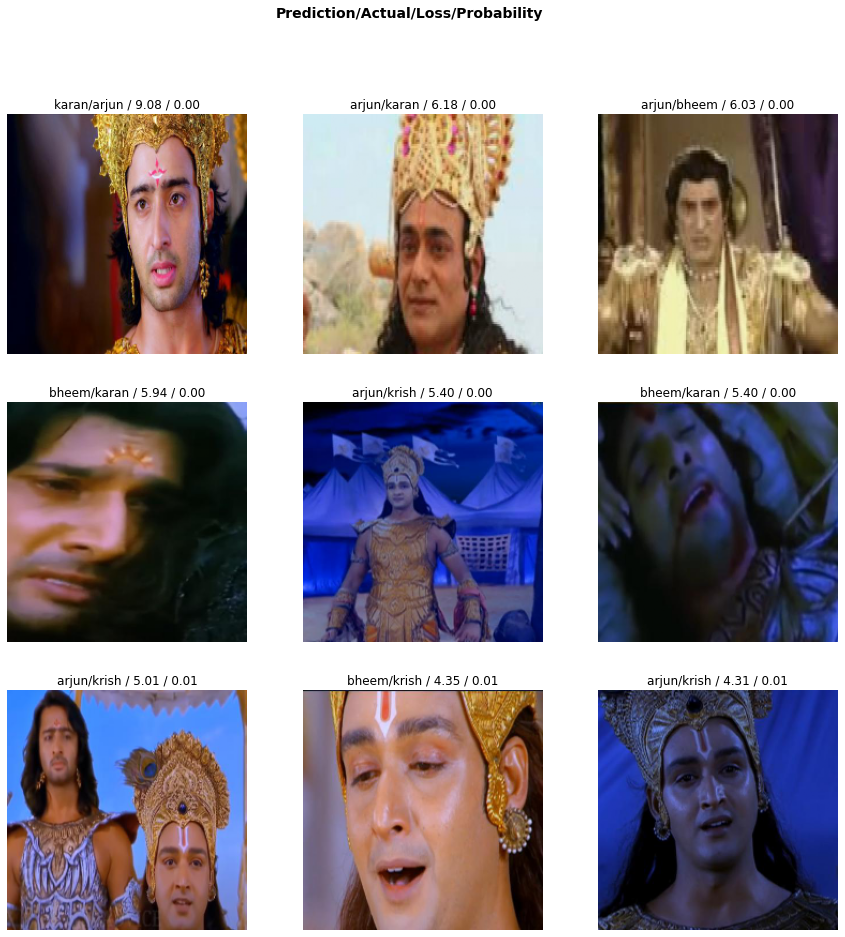

In [ ]:
interp.plot_top_losses(9, figsize=(15,15))

/content/deep_learning_project_mach-3-1/test/krish/m180_PNG.rf.2ed1fbd025d1121278abec86a774bc46.jpg
krish


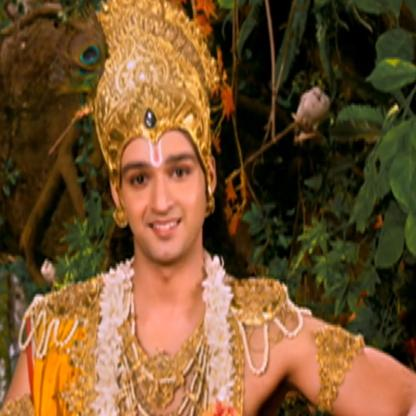



/content/deep_learning_project_mach-3-1/test/krish/m78_PNG.rf.1fb0f80e572bd52d0701f59f4d7271d2.jpg
krish


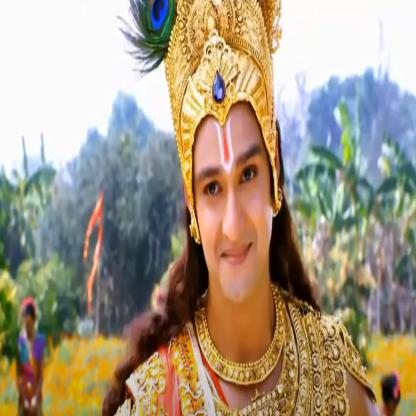



/content/deep_learning_project_mach-3-1/test/krish/m225_PNG.rf.62fcf974a215e84da459f8d5ffdc0fd1.jpg
krish


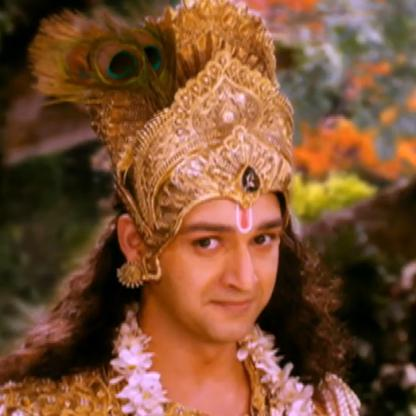



/content/deep_learning_project_mach-3-1/test/krish/58_PNG.rf.e4c6872795193e1d9c009a02d9857994.jpg
karan


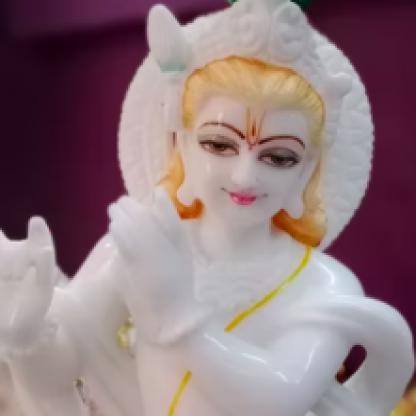



/content/deep_learning_project_mach-3-1/test/krish/m174_PNG.rf.caba0f534791d5982984b6106bdbd3fd.jpg
krish


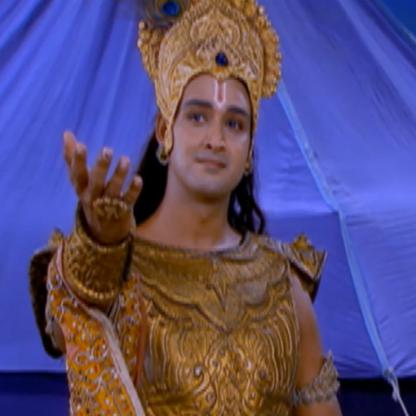



/content/deep_learning_project_mach-3-1/test/krish/m113_PNG.rf.5e639c0d4fc23d6a9dc7c80e819324ae.jpg
krish


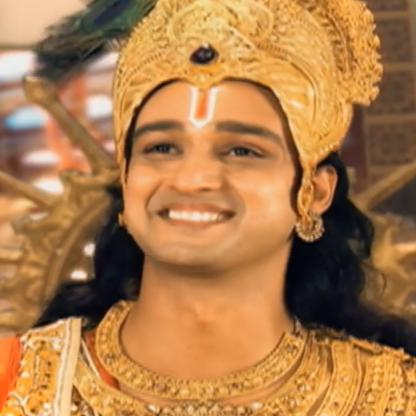



/content/deep_learning_project_mach-3-1/test/krish/25_PNG.rf.e8f13d70225c16a97bf5ec2c9922aa26.jpg
bheem


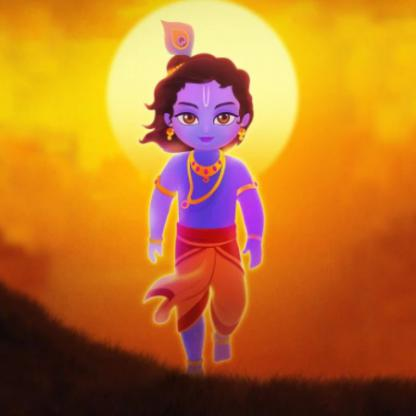



/content/deep_learning_project_mach-3-1/test/krish/84_PNG.rf.3201fec2d41a477efae91711b2c05add.jpg
krish


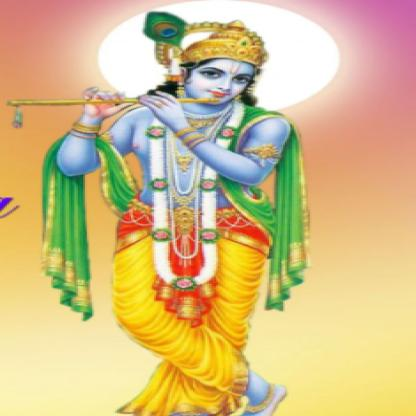



/content/deep_learning_project_mach-3-1/test/krish/n3_PNG.rf.c295c056bc327a0425dce15c66f25f9d.jpg
krish


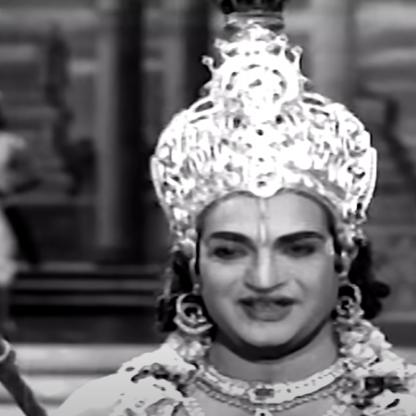



/content/deep_learning_project_mach-3-1/test/krish/m131_PNG.rf.0019c42d3b465b4d087c3024e0d8071e.jpg
bheem


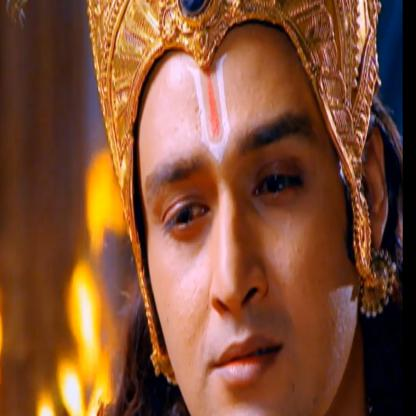



/content/deep_learning_project_mach-3-1/test/krish/m210_PNG.rf.a9e86be1ff078b6e7fc7e9e8df153ab4.jpg
krish


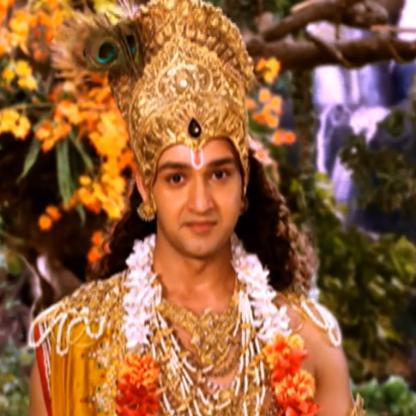



/content/deep_learning_project_mach-3-1/test/krish/m20_PNG.rf.8d548329ad786e314437d719c60f1c4b.jpg
karan


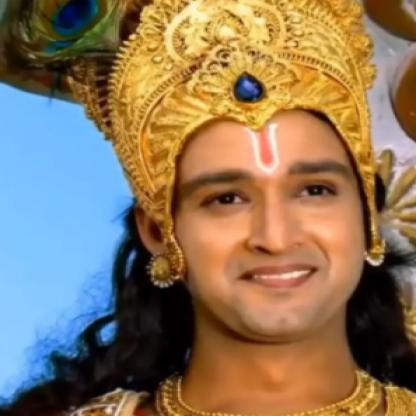



/content/deep_learning_project_mach-3-1/test/krish/m41_PNG.rf.6074c1bd47da83b766a0a02422eee856.jpg
krish


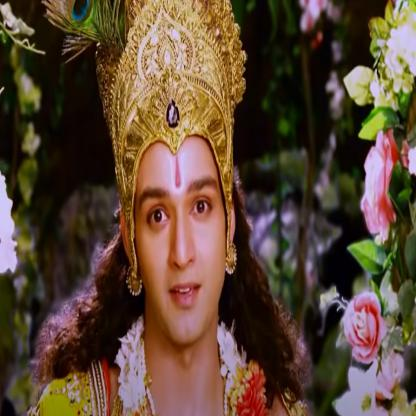



/content/deep_learning_project_mach-3-1/test/krish/m93_PNG.rf.9df44c27deb9ee709733c541ecf6d9b0.jpg
krish


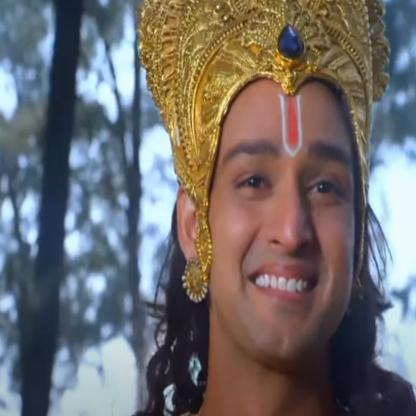



/content/deep_learning_project_mach-3-1/test/krish/m92_PNG.rf.811325472a1f0353b4b08582c6e85aaf.jpg
krish


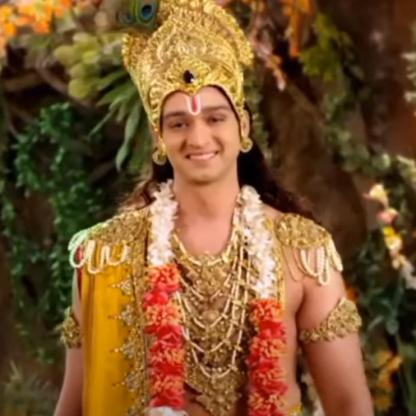



/content/deep_learning_project_mach-3-1/test/krish/m115_PNG.rf.6e0c3aa5ddc4903e71f2938646e5ba93.jpg
krish


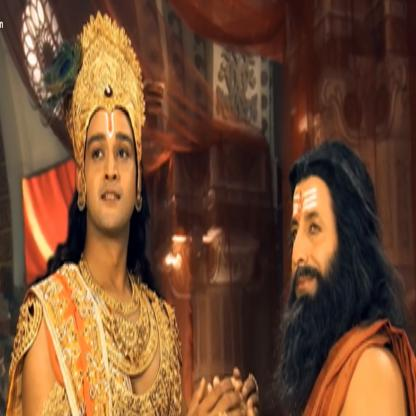



/content/deep_learning_project_mach-3-1/test/krish/m21_PNG.rf.fa2c0c858dc4ded9f86e25ad6c054a41.jpg
krish


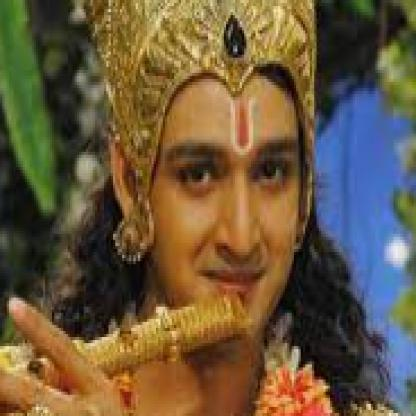



/content/deep_learning_project_mach-3-1/test/krish/m249_PNG.rf.b7c26629d767768fb78ab00640a23927.jpg
krish


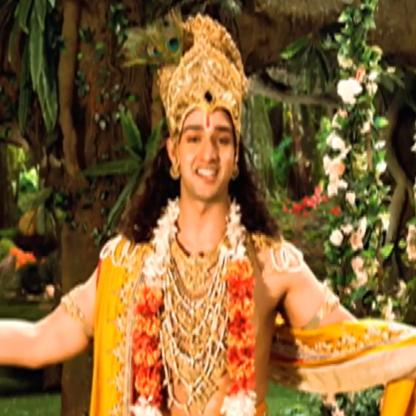



/content/deep_learning_project_mach-3-1/test/krish/m123_PNG.rf.c3539b44c1f9ca21be2d77adc20a8dfd.jpg
krish


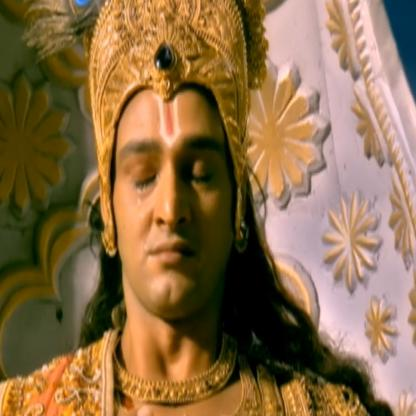



/content/deep_learning_project_mach-3-1/test/krish/85_PNG.rf.f6c28c9b557348c68a4d11b55b043ad9.jpg
krish


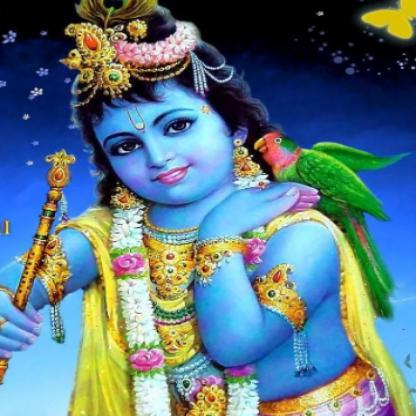



/content/deep_learning_project_mach-3-1/test/krish/71_PNG.rf.82c92025065e4e89ad65f26b20b9f49d.jpg
bheem


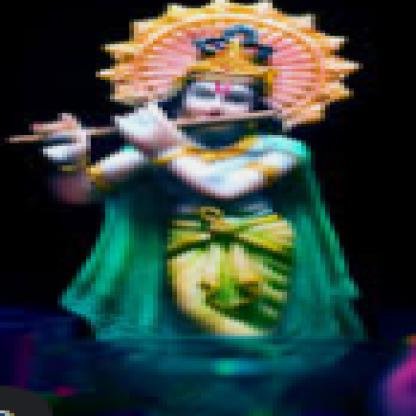



/content/deep_learning_project_mach-3-1/test/krish/m203_PNG.rf.12751a5036bb13379eaf4ab07abead60.jpg
krish


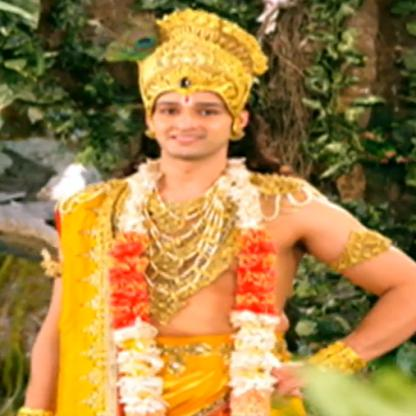



/content/deep_learning_project_mach-3-1/test/krish/m61_PNG.rf.1ebc78e641b4616e37b2a364ba43393f.jpg
krish


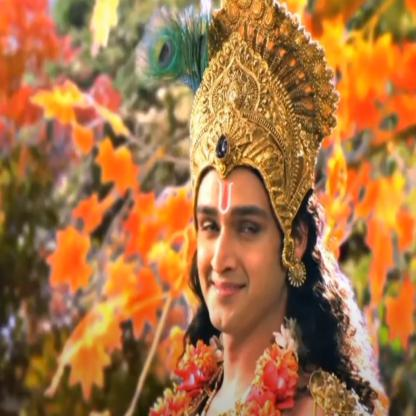



/content/deep_learning_project_mach-3-1/test/krish/m89_PNG.rf.889cf5af70b6f848b1103ab04dc86f9d.jpg
karan


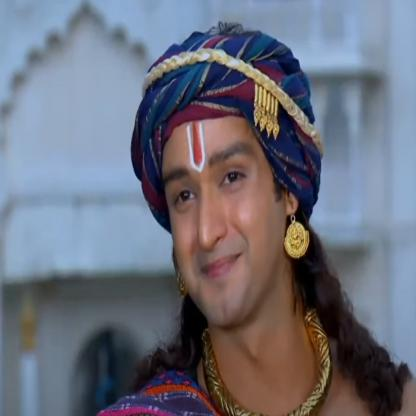



/content/deep_learning_project_mach-3-1/test/krish/68_PNG.rf.9ead2384a05e22de423f74db043d4a9a.jpg
arjun


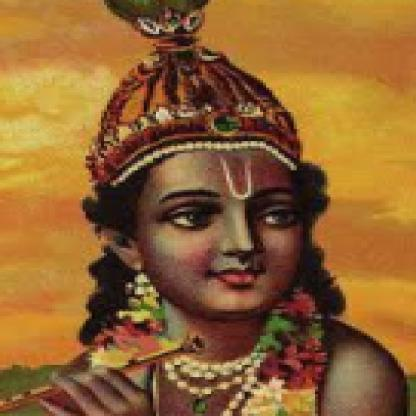



/content/deep_learning_project_mach-3-1/test/krish/m95_PNG.rf.d971518ce7e38619ab813c2c549ef163.jpg
bheem


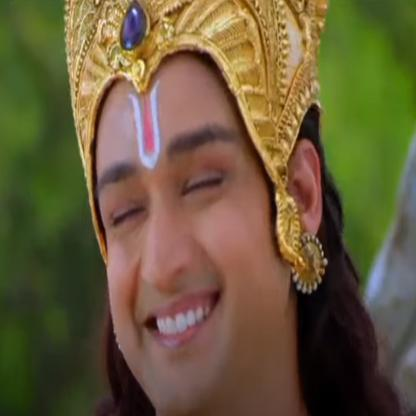



/content/deep_learning_project_mach-3-1/test/krish/m179_PNG.rf.a030fe834b21c372c4323b9ff28f29d6.jpg
krish


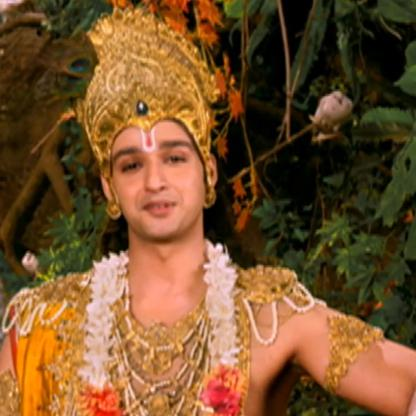



/content/deep_learning_project_mach-3-1/test/krish/37_PNG.rf.17de29f482b38a0d7e7dff34d883908d.jpg
krish


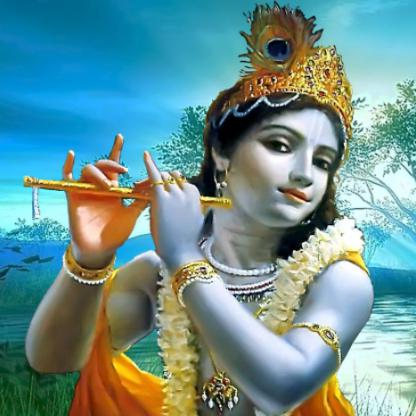

In [ ]:
#run inference on test images
import glob
from IPython.display import Image, display

model = learn.model
model = model.cuda()
for imageName in glob.glob('/content/deep_learning_project_mach-3-1/test/krish/*.jpg'):
    print(imageName)
    img = open_image(imageName)
    prediction = learn.predict(img)
    #print(prediction)
    print(prediction[0])
    display(Image(filename=imageName))
    print("\n")

In [ ]:
%cd deep_learning_project_mach-3-1/

/content/deep_learning_project_mach-3-1


In [ ]:
%ls

models/  README.dataset.txt  README.roboflow.txt  test/  train/  valid/


In [ ]:
%cd models

/content/deep_learning_project_mach-3-1/models


In [ ]:
%ls

best_resnet50.pth  tmp.pth


In [ ]:
from google.colab import files
files.download('/content/deep_learning_project_mach-3-1/models/best_resnet50.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Dataset's google drive link: https://drive.google.com/drive/folders/1kadd4DG2_r38YBF0GfQ5e8dm08EaSkCy?usp=sharing